In [9]:
import scipy.special as sc
import matplotlib.pyplot as plt

In [10]:
def comb(n, k):
    return sc.comb(n, k, exact=True)

def get_hamming_border(n, k):
    t = 0
    cur_sum = comb(n, t)
    while cur_sum + comb(n, t + 1) <= 2 ** (n - k):
        cur_sum += comb(n, t + 1)
        t += 1
    return t * 2 + 2

def get_hilbert_border(n, k):
    if (n == k):
        return 1
    prev_prev_d = 0
    cur_sum = comb(n - 1, prev_prev_d)
    while cur_sum + comb(n - 1, prev_prev_d + 1) < 2 ** (n - k):
        cur_sum += comb(n - 1, prev_prev_d + 1)
        prev_prev_d += 1
    return prev_prev_d + 2

In [11]:
ns = list(range(8, 41, 2))
ks = [n / 2 for n in ns]
ds = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8, 9, 10]
hammings = []
hilberts = []

In [12]:
for n, k, d in zip(ns, ks, ds):
    hamming = get_hamming_border(n, k)
    hilbert = get_hilbert_border(n, k)
    hammings.append(hamming)
    hilberts.append(hilbert)

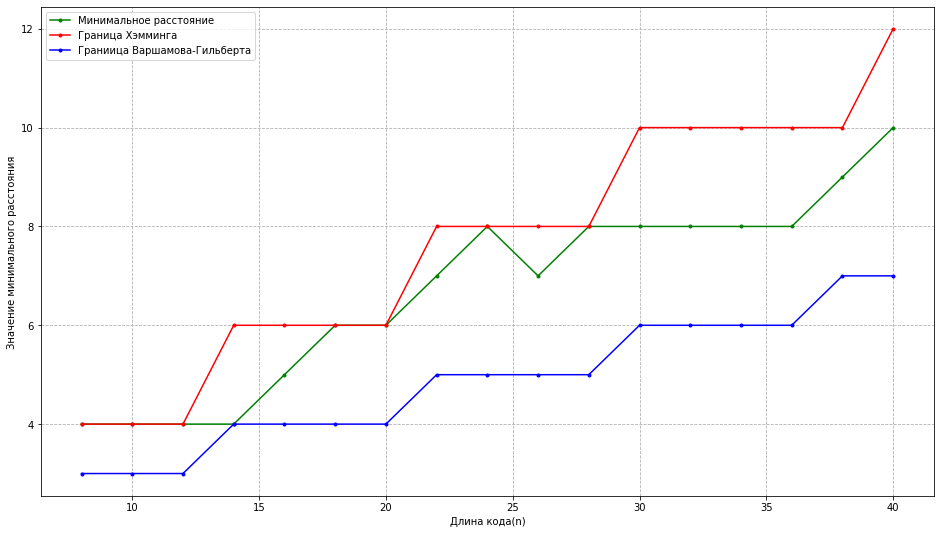

In [14]:
plt.figure(figsize=(16,9))
plt.grid(linestyle='--')
plt.plot(ns, ds, linestyle='-',marker='.',color='g', label='Минимальное расстояние')
plt.plot(ns, hammings, linestyle='-',marker='.',color='r', label='Граница Хэмминга')
plt.plot(ns, hilberts, linestyle='-',marker='.',color='b', label='Граниица Варшамова-Гильберта')
plt.xlabel('Длина кода(n)')
plt.ylabel('Значение минимального расстояния')
plt.legend()
plt.show()